In [8]:
import pickle

with open("../../results/simulation_result.pkl", "rb") as f:
    result = pickle.load(f)

In [9]:
import pandas as pd

def extract_biomass_matrix(result):
    """
    从 result 提取 biomass（行：模型，列：环境）
    """
    rows = []
    for env_idx, model_results in result.items():
        for model_id, (biomass, _) in model_results.items():
            rows.append({
                "model_id": model_id,
                "env_idx": env_idx,
                "biomass": biomass
            })
    
    df = pd.DataFrame(rows)
    biomass_matrix = df.pivot(index="model_id", columns="env_idx", values="biomass")
    return biomass_matrix.fillna(0)

biomass_df = extract_biomass_matrix(result)
biomass_df

env_idx,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
model_id,,,,,,,,,,,,,,,,,,,,,
MAG001_gapfilled_noO2,4.637470,53.788062,180.093446,182.854012,136.579079,181.424849,186.817215,136.748957,51.736027,182.717531,...,166.544528,189.436539,8.651965,183.131089,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG002_gapfilled_noO2,11.890949,137.918107,201.721634,205.623068,203.838299,203.956319,204.494159,200.221946,132.656480,205.086820,...,110.901867,209.943362,7.111706,204.789291,59.058556,78.559345,65.603573,11.360347,183.751535,31.473889
MAG003_gapfilled_noO2,4.637470,12.169564,12.151886,12.394265,12.205488,11.979301,11.982206,11.963983,12.001421,11.987149,...,8.188246,12.539551,2.773565,12.017243,12.083885,11.964615,11.986620,4.430535,12.081468,12.001338
MAG004_gapfilled_noO2,4.637470,53.788062,296.495695,447.021900,136.579079,202.350044,440.068604,136.748957,51.736027,129.159584,...,43.251728,448.262672,2.773565,445.130323,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG005_gapfilled_noO2,164.078598,137.918107,163.821734,165.915036,164.038737,163.963367,165.783861,163.723924,163.657140,164.653957,...,163.934035,166.314399,22.184525,164.926289,12.972593,78.559345,65.603573,163.694658,165.603918,64.824992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAG236_gapfilled_noO2,11.890949,137.918107,760.245373,1000.000000,350.202766,615.967851,1000.000000,350.638352,210.551242,770.854189,...,427.037251,1000.000000,22.184525,1000.000000,59.058556,78.559345,65.603573,11.360347,183.751535,31.473889
MAG237_gapfilled_noO2,4.637470,53.788062,201.025268,441.578549,136.579079,135.214195,152.538014,136.748957,51.736027,129.159584,...,43.251728,442.804149,2.773565,442.712746,23.032837,30.638144,25.585393,4.430535,71.663099,12.274817
MAG238_gapfilled_noO2,11.890949,133.760113,133.760113,133.760113,133.588749,133.760113,133.760113,71.109931,44.070953,133.760113,...,133.451387,133.760113,22.184525,133.760113,59.058556,41.822192,65.603573,11.360347,91.875768,31.473889


In [10]:
import pandas as pd
import numpy as np

def extract_flux_matrix_with_biomass(result):
    rows = []

    for env_idx, model_results in result.items():
        for model_id, (biomass, fluxes) in model_results.items():
            row = {
                "env_idx": env_idx,
                "model_id": model_id,
                "biomass": biomass
            }
            # 添加 flux 向量（编号为 flux_0, flux_1, ...）
            for i, flux in enumerate(fluxes):
                row[f"flux_{i}"] = float(flux)  
            rows.append(row)

    return pd.DataFrame(rows)

df_model = extract_flux_matrix_with_biomass(result)
print(df_model.shape)
df_model.head()

(12000, 199)


,env_idx,model_id,biomass,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,...,flux_186,flux_187,flux_188,flux_189,flux_190,flux_191,flux_192,flux_193,flux_194,flux_195
0,1,MAG001_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.365213,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MAG002_gapfilled_noO2,11.890949,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,MAG003_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,MAG004_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,MAG005_gapfilled_noO2,164.078598,-3.000514,-0.460171,-0.460171,0.000000,-0.460171,-0.460171,-0.460171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import pandas as pd

# 准备数据
X = df_model[[c for c in df_model.columns if c.startswith("flux_")]].values
y = df_model["biomass"].values

# 8:2 划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 弹性网络建模
enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
enet.fit(X_train_scaled, y_train)

# 输出性能
train_r2 = enet.score(X_train_scaled, y_train)
test_r2 = enet.score(X_test_scaled, y_test)
print(f"train R²: {train_r2:.3f}")
print(f"test R²: {test_r2:.3f}")
print("非零系数数:", (enet.coef_ != 0).sum())

train R²: 0.920
test R²: 0.910
非零系数数: 141


/Users/azddza/Library/Caches/pypoetry/virtualenvs/electromics-project-Ddk0_V8b-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+04, tolerance: 2.369e+04
  model = cd_fast.enet_coordinate_descent(


In [12]:
medium_file = "../../models/group_medium_exchanges.tsv"
df_medium = pd.read_csv(medium_file, sep="\t")
flux_col_mapping = {
    f"flux_{i}": df_medium.iloc[i]["met_name"]
    for i in range(len(df_medium))
}

print(df_medium.head())


           rxn_id       met_id         met_name met_formula
0  EX_cpd10515_e0  cpd10515_e0          Fe+2_e0          Fe
1  EX_cpd00254_e0  cpd00254_e0            Mg_e0          Mg
2  EX_cpd15560_e0  cpd15560_e0  Ubiquinone-8_e0    C49H74O4
3  EX_cpd00069_e0  cpd00069_e0    L-Tyrosine_e0    C9H11NO3
4  EX_cpd00058_e0  cpd00058_e0          Cu2+_e0          Cu


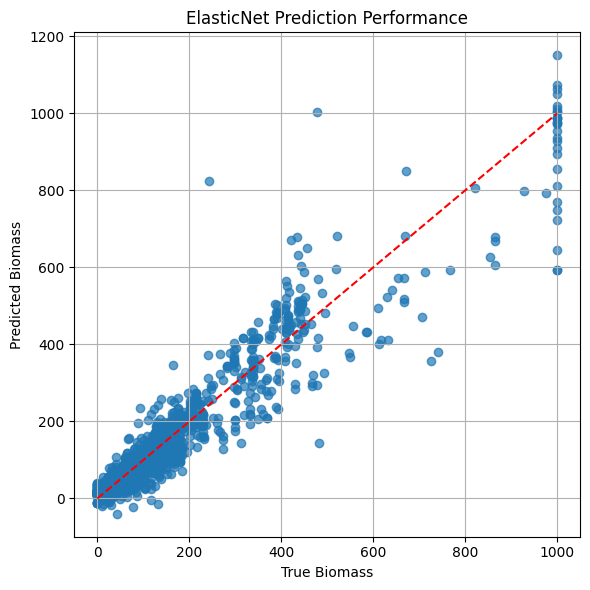

In [21]:
import matplotlib.pyplot as plt

y_pred = enet.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Biomass")
plt.ylabel("Predicted Biomass")
plt.title("ElasticNet Prediction Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

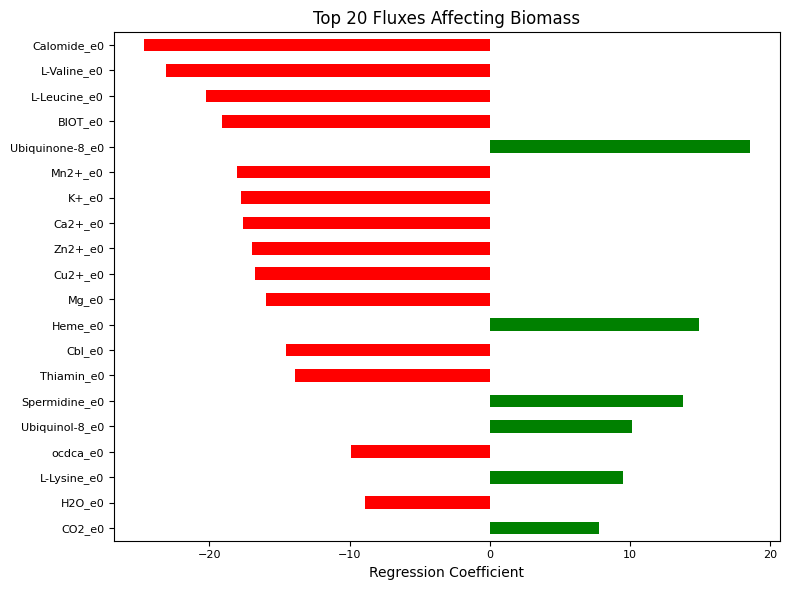

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 获取非零系数
flux_names = [col for col in df_model.columns if col.startswith("flux_")]
coef_series = pd.Series(enet.coef_, index=flux_names)

# 替换成真实代谢物名
coef_series.index = [flux_col_mapping.get(name, name) for name in coef_series.index]

# 只保留非零项，并按绝对值排序，取 top 20
coef_series = coef_series[~coef_series.index.duplicated(keep='first')]
top_coef = coef_series[coef_series != 0].abs().sort_values(ascending=False)[:20]
top_coef = coef_series.loc[top_coef.index]


# 绘图
plt.figure(figsize=(8, 6))
colors = top_coef.apply(lambda x: "green" if x > 0 else "red")
top_coef.plot(kind="barh", color=colors)

plt.gca().invert_yaxis()  # 最高的在最上面
plt.title("Top 20 Fluxes Affecting Biomass", fontsize=12)
plt.xlabel("Regression Coefficient", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



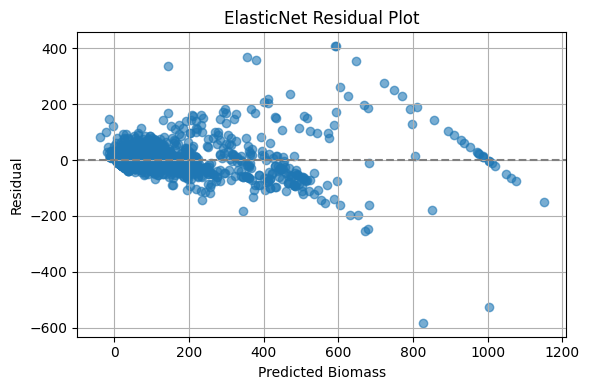

In [26]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Predicted Biomass")
plt.ylabel("Residual")
plt.title("ElasticNet Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


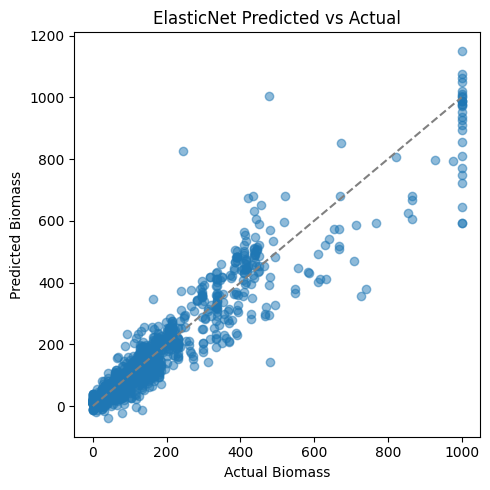

In [27]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, enet.predict(X_test_scaled), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual Biomass")
plt.ylabel("Predicted Biomass")
plt.title("ElasticNet Predicted vs Actual")
plt.tight_layout()
plt.show()
